# Matplotlib

## Introduction

Matplotlib est la bibliothèque mère de visualisation de données avec Python. Il a été créé par John Hunter. Il l'a créé pour essayer de répliquer les capacités de traçage de MatLab (un autre langage de programmation) en Python. Ainsi, si vous êtes familier avec matlab, matplotlib vous semblera naturel.

C'est une excellente bibliothèque graphique 2D et 3D pour générer des figures scientifiques. 

Quelques-uns des principaux avantages de Matplotlib sont:


* De façon générale, facile à utiliser pour des graphiques simples
* Prise en charge des étiquettes et des textes personnalisés
* Grande maîtrise de chaque élément d'une figure
* Sortie de haute qualité dans de nombreux formats
* Très personnalisable en général

Matplotlib vous permet de créer des figures reproductibles par programmation. Apprenez à l'utiliser! Avant de poursuivre ce notebook, je vous encourage à explorer la page web officielle de Matplotlib:  http://matplotlib.org/

## Installation 

Vous devrez d'abord installer matplotlib avec l'un ou l'autre :

    conda install matplotlib
ou
    pip install matplotlib
    
## Importation

Importer le module `matplotlib.pyplot` sous le nom `plt`:

In [1]:
import matplotlib.pyplot as plt

Vous devrez également utiliser cette ligne pour voir les tracés dans le notebook:

In [2]:
%matplotlib inline

Cette ligne n'est que pour les jupyter notebooks, si vous utilisez un autre éditeur, vous utiliserez: **plt.show()** à la fin de toutes vos commandes de traçage pour que la figure apparaisse dans une autre fenêtre.

# Exemple de base

Passons en revue un exemple très simple en utilisant deux tableaux numpy:

### Exemple

Passons en revue un exemple très simple en utilisant deux tableaux numpy. Vous pouvez aussi utiliser des listes, mais vous passerez probablement des tableaux numpy ou des colonnes pandas (qui se comportent essentiellement comme des tableaux).

**Les données que nous voulons tracer :**

In [3]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Commandes de base Matplotlib

Nous pouvons créer un tracé de ligne très simple à l'aide de ce qui suit (je vous encourage à faire une pause et à utiliser Shift+Tab en cours de route pour vérifier la documentation docstrings pour les fonctions que nous utilisons).

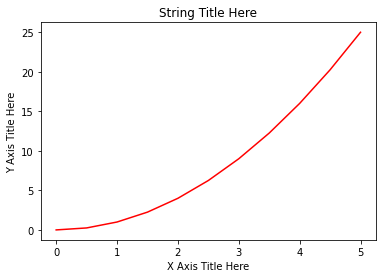

In [6]:
plt.plot(x, y, 'r') # 'r' pour la couleur rouge (red)
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Création de graphiques multiples sur le même tableau

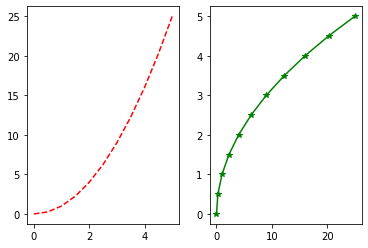

In [7]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # Plus d'informations sur les options de couleurs plus tard
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Méthode Orientée Objet
Maintenant que nous avons vu les bases, décomposons le tout avec une introduction plus formelle de l'API orientée objet de Matplotlib. Cela signifie que nous instancions les objets figures et appelons ensuite les méthodes ou attributs à partir de cet objet.

## Introduction à la Méthode Orientée Objet

L'idée principale dans l'utilisation de la méthode plus formelle Orientée Objet est de créer des objets figures et d'appeler ensuite simplement des méthodes ou attributs à partir de cet objet. Cette approche est plus agréable lorsqu'il s'agit d'un tableau sur laquelle il y a plusieurs parcelles. 

Pour commencer, nous créons une instance de figure. Ensuite, nous pouvons ajouter des axes à cette figure:

Text(0.5, 1.0, 'Set Title')

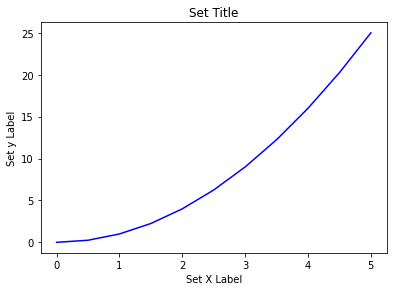

In [8]:
# Création d'un objet Figure (tableau vide)
fig = plt.figure()

# Ajout d'un ensemble d'axes à la figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # gauche, bas, largeur, hauteur (plage de 0 à 1)

# Tracé sur cet ensemble d'axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # remarquez l'utilisation des méthodes set_ pour commencer
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Le code est un peu plus compliqué, mais l'avantage est que nous avons maintenant le contrôle total de l'emplacement des axes du tracé, et nous pouvons facilement ajouter plus d'un axe à la figure:

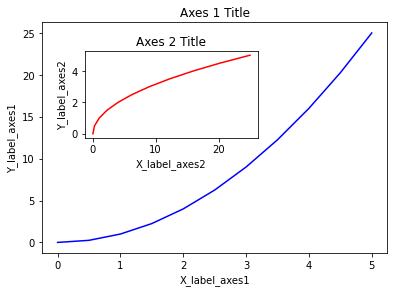

In [9]:
# Créer un tableau vide
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # axes principaux
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # axes rentrants

# Plus grande figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insérer une figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

L'objet plt.subplots() agira comme un gestionnaire d'axes plus automatique.

Cas d'utilisation de base:

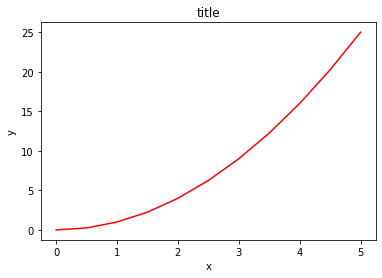

In [10]:
# Utiliser comme plt.figure() sauf utiliser la syntaxe tuple pour récupérer fig et axes.
fig, axes = plt.subplots()

# Utiliser maintenant l'objet axes pour ajouter des éléments au tracé
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Ensuite, vous pouvez spécifier le nombre de lignes et de colonnes lors de la création de l'objet subplots():

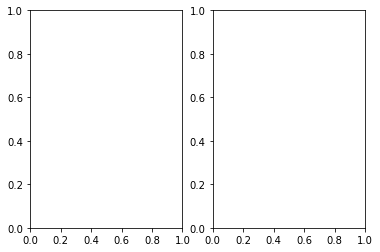

In [11]:
# Toile vide de 1 par 2 sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2)

In [12]:
# Axes est un tableau d'axes sur lesquels on peut tracer des axes
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Nous pouvons itérer à travers ce tableau:

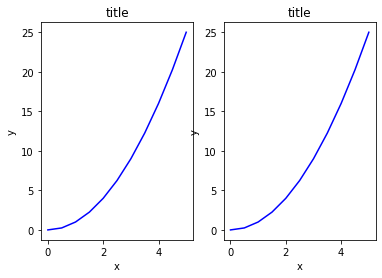

In [13]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Afficher l'objet figure   
fig

Un problème courant avec matplolib est le chevauchement des sous-graphiques ou des figures. Nous pouvons utiliser la méthode **fig.tight_layout()** ou **plt.tight_layout()** qui ajuste automatiquement les positions des axes sur le canevas des figures afin qu'il n'y ait pas de chevauchement de contenu:

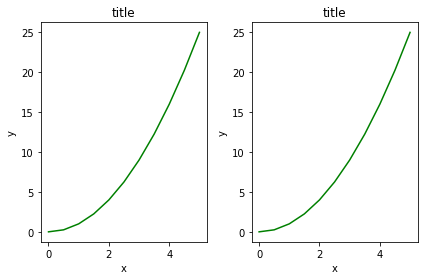

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Taille des figures, rapport hauteur/largeur et DPI

Matplotlib permet de spécifier l'aspect de ratio, de DPI et de taille de la figure lors de la création de l'objet Figure. Vous pouvez utiliser les arguments `figsize` et `dpi`. 
* `figsize` est un tuple de la largeur et de la hauteur de la figure en pouces
* `dpi` est le nombre de points par pouce (pixel par pouce). 

par exemplee:

In [15]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Les mêmes arguments peuvent également être transmis aux gestionnaires de mise en page, tels que la fonction `subplots`:

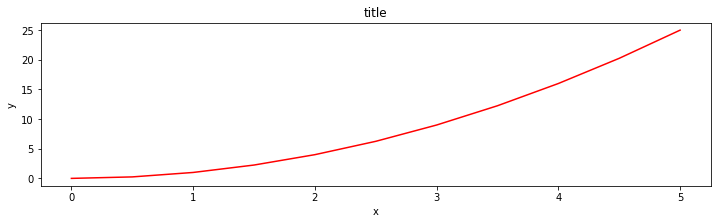

In [16]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Sauvegarde des figures
Matplotlib peut générer des sorties de haute qualité dans plusieurs formats, notamment PNG, JPG, EPS, SVG, PGF et PDF.

Pour enregistrer une figure dans un fichier, nous pouvons utiliser la méthode `savefig` de la classe `Figure`:

In [17]:
fig.savefig("filename.png")

Ici, nous pouvons aussi spécifier le DPI et choisir entre différents formats de sortie:

In [18]:
fig.savefig("filename.png", dpi=200)

____
## Légendes, étiquettes et titres

Maintenant que nous avons couvert les bases de la création d'un canevas de figures et de l'ajout d'instances d'axes dans le canevas, voyons comment décorer une figure avec des titres, des étiquettes d'axes et des légendes.

**Titres de figure**

Un titre peut être ajouté à chaque instance d'axe dans une figure. Pour définir le titre, utilisez la méthode `set_title` de l'instance axes:

In [19]:
ax.set_title("title");

**Etiquettes d'axes**

De même, avec les méthodes `set_xlabel` et `set_ylabel`, nous pouvons définir les étiquettes des axes X et Y:

In [20]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Légendes

Vous pouvez utiliser l'argument **label="texte étiquette"** lorsque des tracés ou d'autres objets sont ajoutés à la figure, et ensuite utiliser la méthode **legend** sans arguments pour ajouter la légende à la figure:

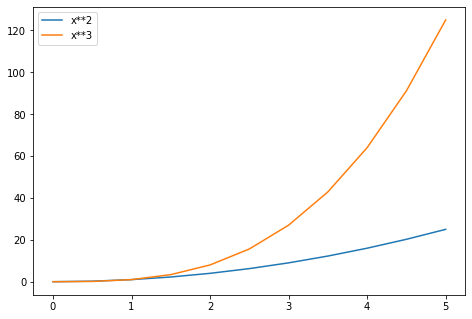

In [21]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notez à quel point la légende recouvre le tracé!

La fonction **legend** prend un argument optionnel **loc** qui peut être utilisé pour spécifier où la légende doit être dessinée dans la figure. Les valeurs autorisées de **loc** sont des codes numériques pour les différents endroits où la légende peut être dessinée. Voir la [page de documentation](http://matplotlib.org/users/legend_guide.html#legend-location) pour plus de détails. Certaines des valeurs **loc** les plus courantes sont:

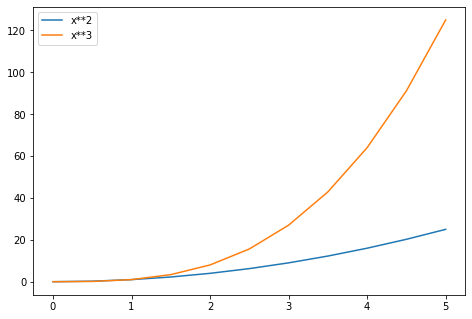

In [22]:
# Beaucoup d'options....

ax.legend(loc=1) # coin supérieur droit
ax.legend(loc=2) # coin supérieur gauche
ax.legend(loc=3) # coin inférieur gauche
ax.legend(loc=4) # coin inférieur droit

# .. beaucoup plus d'options sont disponibles

# Le plus courant à choisir
ax.legend(loc=0) # laisse matplotlib décider de l'emplacement optimal
fig

## Réglage des couleurs, largeurs de trait, types de trait

Matplotlib vous donne *beaucoup* d'options pour personnaliser les couleurs, les largeurs de trait et les types de trait. 

Il y a la syntaxe de base de MATLAB (que je vous suggère d'éviter d'utiliser pour des raisons plus claires:

### Couleurs avec une syntaxe semblable à celle de MatLab

Avec matplotlib, nous pouvons définir les couleurs des lignes et autres éléments graphiques de plusieurs façons. Tout d'abord, nous pouvons utiliser la syntaxe de type MATLAB où `'b'` pour blue (bleu), `'g'` pour green (vert), etc. L'API MATLAB pour la sélection des styles de lignes est également supportée: où, par exemple, 'b.-' pour une ligne bleue avec des points:

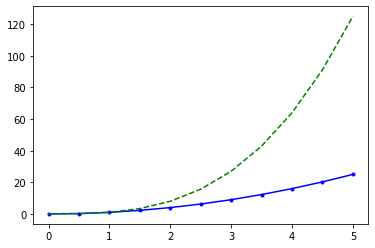

In [23]:
# Couleur et style des lignes de style MATLAB 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # ligne bleue point tiret
ax.plot(x, x**3, 'g--') # ligne pointillée verte

### Couleurs avec le paramètre color=

Nous pouvons également définir les couleurs par leurs noms ou codes hexadécimaux RVB et éventuellement fournir une valeur alpha en utilisant les arguments `color` et `alpha`. Alpha indique l'opacité.

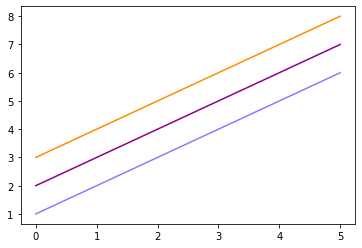

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # à moitié transparent
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Styles de lignes et de marqueurs

Pour modifier l'épaisseur de ligne, on peut utiliser l'argument `linewidth` ou `lw`. Le style de ligne peut être sélectionné à l'aide des arguments `linestyle` ou `ls`:

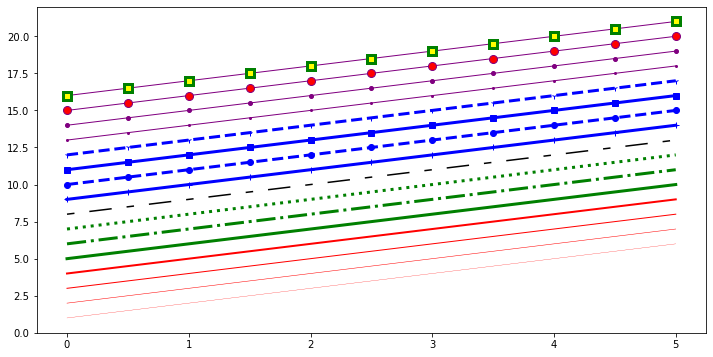

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# options de types de lignes possibles ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# tiret customisé
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format : longueur de ligne, longueur d'espace, ...

# symboles de marquage possibles: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# taille et couleur des marqueurs
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Contrôle de l'apparence des axes

Dans cette section, nous allons examiner le contrôle des propriétés de dimensionnement des axes dans une figure matplotlib.

## Plage de représentation graphique

Nous pouvons configurer les plages des axes à l'aide des méthodes `set_ylim` et `set_xlim` sur l'objet axes, ou `axis('tight')` pour obtenir automatiquement des gammes d'axes "bien ajustés":

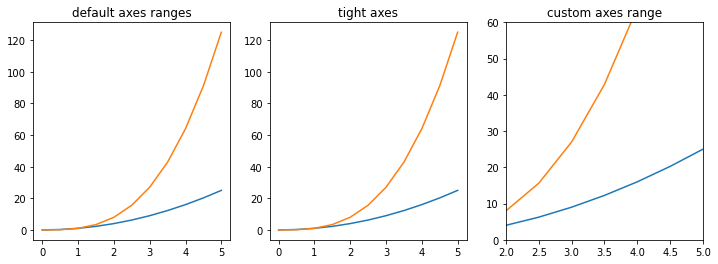

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Type de graphique spécial

Il existe de nombreux diagrammes spécialisés que nous pouvons créer, tels que des diagrammes à barres, des histogrammes, des diagrammes de dispersion, et bien plus encore. La plupart de ces types de graphiques que nous allons créer en utilisant pandas. Mais voici quelques exemples des types de graphique:

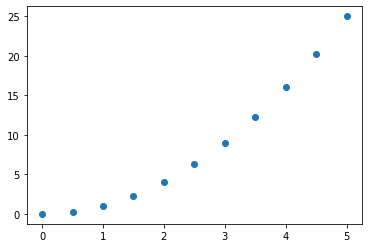

In [27]:
plt.scatter(x,y)

(array([13., 12.,  8., 11.,  7.,  6., 12., 15.,  6., 10.]),
 array([ 10. , 108.6, 207.2, 305.8, 404.4, 503. , 601.6, 700.2, 798.8,
        897.4, 996. ]),
 <BarContainer object of 10 artists>)

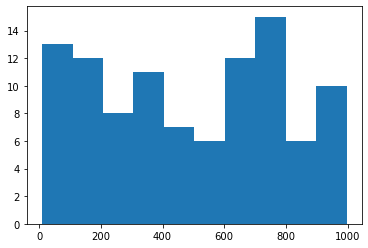

In [28]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

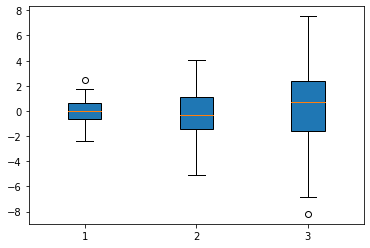

In [29]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# boîte à moustache
plt.boxplot(data,vert=True,patch_artist=True);   

## Lectures complémentaires

* http://www.matplotlib.org - La page web du projet matplotlib.
* https://github.com/matplotlib/matplotlib - Le code source de matplotlib.
* http://matplotlib.org/gallery.html - Une grande galerie présentant les différents types de graphiques que matplotlib peut créer. Fortement recommandé! 
* http://www.loria.fr/~rougier/teaching/matplotlib - Un bon tutoriel matplotlib.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Une autre bonne référence matplotlib.
